<a href="https://colab.research.google.com/github/ReinerJasin/ai-app-sys/blob/main/MID_TERM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3

The following sections will explain how neural networks be done programatically

Below is the figure used to demonstrate how the learning algorithm for multilevel feedforward networks works. We are going to make the same exact neuron networks.

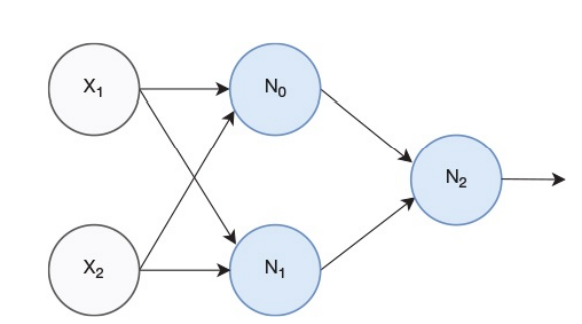

## Step 1

Now, let's prepare the libraries and the variables consist of all sample data which will be used for the demonstration.

In [1]:
# Import numpy libraries
import numpy as np

# Set numpy random seed to make sure the random result is always the same if being run multiple times
np.random.seed(3)

# Initiate Learning rate value and Random order
LEARNING_RATE = 0.1
index_list = [0, 1, 2, 3]

# Sample input data
x_train = [np.array([1.0, -1.0, -1.0]),
           np.array([1.0, -1.0, 1.0]),
           np.array([1.0, 1.0, -1.0]),
           np.array([1.0, 1.0, 1.0]),]

# Sample output (ground truth)
y_train = [0.0, 1.0, 1.0, 1.0, 0.0]

One thing to notice is the ground truth value only consist of 1 and 0 because we are going to use sigmoid function as the activation function, so the result will be ranged from 0 to 1 at most.

## Step 2

Next, let's setup a function which will be used as our neuron. It will has the attributes of the number of inputs, layers, and number of neurons in each layer.

In [2]:
# Initialize a function of the neuron including the weights
def neuron_w(input_count):
  weights = np.zeros(input_count+1)
  for i in range(1, (input_count+1)):
    weights[i] = np.random.uniform(-1.0, 1.0)
  return weights

# Neuron weights based on the figure shown previously
n_w = [neuron_w(2), neuron_w(2), neuron_w(2)]

# Output (ground truth)
n_y = [0,0,0]

# Error term
n_error = [0,0,0]

in the neuron_w function, we will ask the parameter input_count which will indicate how many input value will the neuron accepted.
After that, we are going to use the np.zeros() function to create a new array with zero value.
This array (except for the first index which is used for the bias weights) then filled with random value ranged from -1 to 1.

This step is important because if we leave the neuron weight with the same value which is 0 in this case, they will all behave the same when the learning process is running and the weight adjustment will also be identical. Or we can say it's useless to have multiple neurons if the value are all the same.

## Step 3

In [3]:
def show_learning():
  print('Current weights:')
  for i, w in enumerate(n_w):
    print('neuron ', i, ': w0 =', '%5.2f' % w[0], ' w1 =', '%5.2f' % w[1], ', w2 =', '%5.2f' % w[2])
    print('---------------------')

show_learning() function is used to show the current state or value of the weights in our neurons.

In [4]:
def forward_pass(x):
  
  global n_y

  # Compute the output of each neuron by applying hyperbolic tangent function
  n_y[0] = np.tanh(np.dot(n_w[0], x)) # n_y = Output for Neuron 0
  n_y[1] = np.tanh(np.dot(n_w[1], x)) # n_y = Output for Neuron 1

  # Collecting the results from each neurons and put it inside a single array
  # put extra 1 index in front for the bias weight
  n2_inputs = np.array([1.0, n_y[0], n_y[1]]) # 1.0 is bias

  # Multiplication of input value and the weights in Neuron 2
  z2 = np.dot(n_w[2], n2_inputs)

  # Sigmoid Function activation which is done manually using mathematical equation
  n_y[2] = 1.0 / (1.0 + np.exp(-z2))

Mathematical equation of Sigmoid Function:

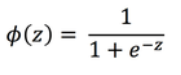

In [5]:
def backward_pass(y_truth):

  global n_error

  # Compute the derivative of the error/loss function
  error_prime = -(y_truth - n_y[2])
  derivative = n_y[2] * (1.0 - n_y[2])
  n_error[2] = error_prime * derivative # Error term

  # Compute the derivative of the logistic sigmoid function
  derivative = 1.0 - n_y[0]**2 # tanh derivative
  n_error[0] = n_w[2][1] * n_error[2] * derivative

  derivative = 1.0 - n_y[1]**2 # tanh derivative
  n_error[1] = n_w[2][2] * n_error[2] * derivative

In [6]:
def adjust_weights(x):

  global n_w

  # Adjust the weight by multiplying the input by the learning rate and the error term in the neuron
  n_w[0] -= (x * LEARNING_RATE * n_error[0])
  n_w[1] -= (x * LEARNING_RATE * n_error[1])
  
  n2_inputs = np.array([1.0, n_y[0], n_y[1]]) # 1.0 is bias
  n_w[2] -= (n2_inputs * LEARNING_RATE * n_error[2])

We just finished creating all the needed function to do the training process.

Now, we are going to create a loop to keep training the model until we reached the desried result.

In [7]:
# Network training loop

all_correct = False

while not all_correct: # Will keep running until converged
  
  all_correct = True
  
  np.random.shuffle(index_list) # Randomize order
  
  # Every Neural Network training process is procsesed here
  for i in index_list:
    forward_pass(x_train[i])
    backward_pass(y_train[i])
    adjust_weights(x_train[i])
    show_learning() # Show updated weights for each iteration
  
  # Check if the result is converged or not
  for i in range(len(x_train)):
    forward_pass(x_train[i])
    print('x1 =', '%4.1f' % x_train[i][1],
          ', x2 =', '%4.1f' % x_train[i][2],
          ', y =', '%.4f' % n_y[2])

    # Check if the y_train and n_y is both higher or lower than 0.5
    # This indicates that the prediction result is most likely to be true or false
    if(((y_train[i] < 0.5) and (n_y[2] >= 0.5)) or ((y_train[i] >= 0.5) and (n_y[2] < 0.5))):
      all_correct = False

Current weights:
neuron  0 : w0 =  0.01  w1 =  0.11 , w2 =  0.41
---------------------
neuron  1 : w0 =  0.01  w1 = -0.41 , w2 =  0.01
---------------------
neuron  2 : w0 =  0.01  w1 =  0.78 , w2 =  0.79
---------------------
Current weights:
neuron  0 : w0 =  0.00  w1 =  0.12 , w2 =  0.41
---------------------
neuron  1 : w0 =  0.00  w1 = -0.40 , w2 =  0.02
---------------------
neuron  2 : w0 =  0.00  w1 =  0.79 , w2 =  0.78
---------------------
Current weights:
neuron  0 : w0 =  0.01  w1 =  0.13 , w2 =  0.42
---------------------
neuron  1 : w0 =  0.01  w1 = -0.39 , w2 =  0.03
---------------------
neuron  2 : w0 =  0.01  w1 =  0.79 , w2 =  0.78
---------------------
Current weights:
neuron  0 : w0 =  0.02  w1 =  0.12 , w2 =  0.43
---------------------
neuron  1 : w0 =  0.01  w1 = -0.40 , w2 =  0.03
---------------------
neuron  2 : w0 =  0.02  w1 =  0.80 , w2 =  0.78
---------------------
x1 = -1.0 , x2 = -1.0 , y = 0.4797
x1 = -1.0 , x2 =  1.0 , y = 0.6451
x1 =  1.0 , x2 = -1.0 

> To Learn more about how neural network works and the best activation function to use, please read this article below <br>
[Click this link](https://docs.google.com/document/d/1h1HJRZ1knwdb9I-AQyMwi2PWALkQR30iXjngQ5U7YHw/edit)




# Week 4

In this section, we are going to show a MNIST data to understand how fully connected layers can read an image by its pixel value

Begin by downloading the 4 files of the dataset from the link below : <br> [THE MNIST DATABASE](http://yann.lecun.com/exdb/mnist/)

After that, upload the file to a folder named 'data' in your google colab files directory

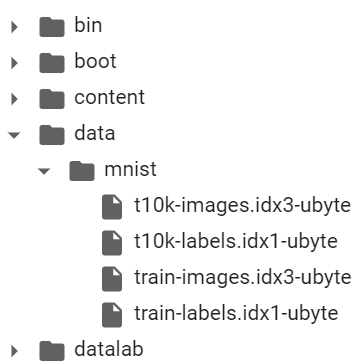

Right click and copy path of each file to be used later.

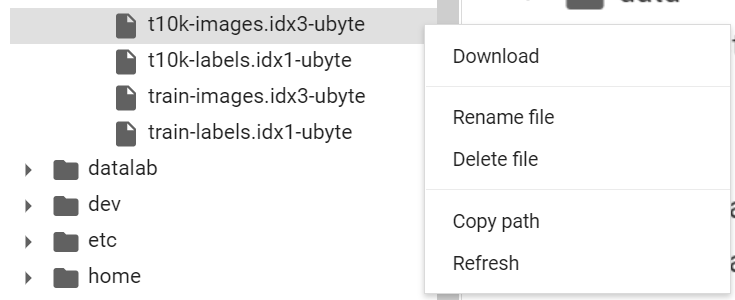

Now, let's install idx2numpy, a library that will help us extracting the MNIST dataset.

In [8]:
# Install idx2numpy library
!pip install idx2numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7917 sha256=9c0c0b399aa11b7eb7c5af801249dbb1454f26fd0c3dad2fb6dbad91e04b6501
  Stored in directory: /root/.cache/pip/wheels/1a/ce/ad/d5e95a35cfe34149aade5e500f2edd535c0566d79e9a8e1d8a
Successfully built idx2numpy


Import idx2numpy and prepare all the dataset we're going to use

In [9]:
# Import idx2numpy library
import idx2numpy

# Define the path for each dataset
TRAIN_IMAGE_FILENAME = '/data/mnist/train-images.idx3-ubyte'
TRAIN_LABEL_FILENAME = '/data/mnist/train-labels.idx1-ubyte'
TEST_IMAGE_FILENAME = '/data/mnist/t10k-images.idx3-ubyte'
TEST_LABEL_FILENAME = '/data/mnist/t10k-labels.idx1-ubyte'

# Read files
train_images = idx2numpy.convert_from_file(TRAIN_IMAGE_FILENAME)
train_labels = idx2numpy.convert_from_file(TRAIN_LABEL_FILENAME)
test_images = idx2numpy.convert_from_file(TEST_IMAGE_FILENAME)
test_labels = idx2numpy.convert_from_file(TEST_LABEL_FILENAME)

# Print dimensions of each dataset
print('dimensions of train_images: ', train_images.shape)
print('dimensions of train_labels: ', train_labels.shape)
print('dimensions of test_images: ', test_images.shape)
print('dimensions of test_labels: ', test_labels.shape)

FileNotFoundError: ignored

The dataset is ready. Let's print 1 of the data to see how it looks.

In [ ]:
# Print one training example
print('label for first training example: ', train_labels[0])
print('---beginning of pattern for first training example---')

# Output '*' for low intensity pixel, and ' ' for high intensity pixel
for line in train_images[0]:
  for num in line:
    if num > 0:
      print('*', end = ' ')
    else:
      print(' ', end = ' ')
  print('')
print('---end of pattern for first training example---')

The first dataset from the training example is the number 5. So fully connected layer read pixel data from its intensity. In this case we put a certain threshold to decide whether a pixel is dark or light (pixel larger than 0 is dark, otherwise it's light).

# Week 5

In Week 5, we are learning about tensorflow basic including the TensorFlow session, placeholder, mathematical operators. Also, we are going to learn how to visualize the result on tensorboard

TensorFlow is a popular library on python that provides functionality more specifically on making deep learning models.

To start, we are going to connect this google colab with our google drive account

In [ ]:
# Import libraries
import os
from google.colab import drive

# Set mount point to the main google drive directory
MOUNTPOINT = "/content/drive"

# Set more detailed data directory path to the folder
DATADIR = os.path.join(MOUNTPOINT, "MyDrive/INHA-AI_Application_System")

# Mount the drive
drive.mount(MOUNTPOINT)

Next we are going to install TensorFlow 1.15.5. This step is not mandatory because google colab has tensorflow installed on every python notebook already.

In this case, we want to make sure that we are using the same version of TensorFlow which is 1.15.5.

In [ ]:
# Install TensorFlow 1.15.5
!pip install tensorflow==1.15.5

In the next section, we are going to use a variable, constant, and placeholder to work with numbers

1.   **Variables**<br>
Variable is trainable, after being constructed, we can use the assign method to add value. Default value is None.
2.   **Constants** <br>
Constant is NOT trainable, and has to be put initial value (can't be null).
3.   **Placeholder** <br>
Place holder is used to store value, but the value can be given in the later process.



In [ ]:
# Import libraries
import numpy as np
import tensorflow as tf

# Run code within a session to get the output of node C
with tf.compat.v1.Session() as sess:

  # make a new tensorflow variable and constant
  a = tf.Variable(0, name = 'input')
  b = tf.constant(1)

  # use addition operator and assign the result to the variable
  mid = tf.add(a,b)
  final = tf.compat.v1.assign(a, mid)

  # Initialize the created variables
  # In TensorFlow2, variable doesn't have to be initialized before using
  var = tf.compat.v1.initialize_all_variables()
  sess.run(var)

  # To run the context session
  print(sess.run(a))

  # To run the context session with loop function
  for i in range(3):
    sess.run(final)
    print(sess.run(a))

Example usage of TensorFlow Constant

In [ ]:
with tf.compat.v1.Session() as sess:
    a = tf.constant(3)
    b = tf.constant(5)
    c = a + b
    print(sess.run(c))

Example usage of TensorFlow Placeholders

In [ ]:
# Disable eager execution
tf.compat.v1.disable_eager_execution()
x = tf.compat.v1.placeholder("float32", None)
y = x**2
with tf.compat.v1.Session() as sess:
  result = sess.run(y, feed_dict = {x: [1,2,3]})
  print(result)

Next we are going to use TensorBoard on Google Colab to present graph

before that, we need to create a file using FileWriter so that we have something to be shown as a graph

In [ ]:
# Install Tensorboard library
!pip install tensorboard

In [ ]:
# Some mathematical operations
a = tf.add(1,2, name = "addition_1")
b = tf.multiply(a,3, name = "multiplying_1")
c = tf.add(4,5, name = "addition_2")
d = tf.multiply(c,6, name = "multiplying_2")
e = tf.multiply(4,5)
f = tf.div(c,6, name = "division")

# Counting the final result
g = tf.add(b,d)
h = tf.multiply(g,tf.cast(f, tf.int32))


with tf.compat.v1.Session() as sess:
  # Use FileWriter to save the graph result in the logs folder inside google colab directory
  writer = tf.summary.FileWriter("./logs", sess.graph)
  print(sess.run(h))
  writer.close()

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=logs

Next we are goint to see how to use tensorflow scalar

In [ ]:
# Reset tensorflow graph
tf.reset_default_graph()

# Get variable
s_scalar = tf.get_variable(name = 'x_scalar', shape = [], initializer = tf.truncated_normal_initializer(mean = 0, stddev = 1))

# A scalar summary for scalar tensor
first_summary = tf.summary.scalar(name = 'First_summary', tensor = s_scalar)

init = tf.global_variables_initializer()

with tf.Session() as sess:
  # Save scalar result
  writer = tf.summary.FileWriter('./logs', sess.graph)

  # Run session and write summary
  for i in range(100):
    sess.run(init)
    summary = sess.run(first_summary)
    writer.add_summary(summary, i)

In [ ]:
# Reset tensorflow graph
tf.reset_default_graph()

# Get variable
s_scalar = tf.get_variable(name = 'x_scalar', shape = [], initializer = tf.truncated_normal_initializer(mean = 0, stddev = 1))
y_matrix = tf.get_variable(name = 'y_matrix', shape = [40,50], initializer = tf.truncated_normal_initializer(mean = 0, stddev = 1))

# A scalar summary for scalar tensor
first_summary = tf.summary.scalar(name = 'First_summary', tensor = s_scalar)

# A histogram summary for non-scalar tensor 2d or 3d matrix
histogram_summary = tf.summary.scalar(name = 'First_summary', tensor = s_scalar)

init = tf.global_variables_initializer()

with tf.Session() as sess:
  # Save scalar result
  writer = tf.summary.FileWriter('./logs', sess.graph)

  # Run session and write summary
  for i in range(100):
    sess.run(init)
    summary1, summary2 = sess.run([first_summary, histogram_summary])
    writer.add_summary(summary1, i)
    writer.add_summary(summary2, i)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=logs

# Week 6 (Session 1)

In this section, we will see how to make a Linear Regression using TensorFlow and use TensorBoard to show the result.

After we successfully make the linear regression, we will proceed with one classification example which is MNIST dataset classification. MNIST is dataset consist of handwritten digit images.

## a. Linear Regression

Let's install all the things we need.

In [ ]:
# Install TensorFlow 1.15.5
!pip install tensorflow==1.15.5

# Install Libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Next we want to create the hyperparameters. Hyperparameter consist of constant value which will be used during the whole session. In this case, we are going to need the parameter for learning rate and epochs

In [ ]:
# Create the hyperparameter
learning_parameter = 0.01   # learning rate
epochs = 300                # how much repetition for the learning

We are going to create a sample dataset with random numbers to be shown on the graph later

In [ ]:
# The number of dataset
sample_points = 50

# np.linspace will return evenly spaced numbers with specified interval
x_train = np.linspace(0,30,sample_points)

# This is a simple mathematical equation to produce the result of y_train (ground truth)
y_train = 6*x_train + 7*np.random.randn(sample_points)

Once the data is created, we can show it using matplotlib libraries using the following code.

In [ ]:
# Noisy dataset we just created
plt.plot(x_train, y_train, 'o')

# Noise free dataset / The middle line
plt.plot(x_train, 6*x_train)

plt.show()

After that, we want to fit noisy dataset to our linear regression model, so let's make the placeholders and variables

The linear regression formula that we use is quite simple :
Y= WX + B

In [ ]:
# Placeholder
Y = tf.placeholder(tf.float32)  # for the Result (ground truth)
X = tf.placeholder(tf.float32)  # for the Input data

# Variables
W = tf.Variable(np.random.randn(), name = 'weights')  # for the Weight
B = tf.Variable(np.random.randn(), name = 'bias')     # for the Bias

In [ ]:
# Create the model for regression
prediction = W*X + B

# Cost function
cost_iteration = tf.reduce_sum((prediction-Y)**2)/(2*sample_points)

# Define the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

# Initialize the variables
init = tf.global_variables_initializer()

Now, we can train our model to do the prediction. Don't forget to create a TensorFlow session.

In [ ]:
# Create a TensorFlow session
with tf.Session() as sess:
  sess.run(init)

  # Loop with the total number of epochs
  for epoch in range(epochs):

    # Loop through each of the training data
    for x,y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X :x, Y : y})

    # Print the model state every 40 epoch
    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X : x, Y : y})
      print('Epochs %f Cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
  
  Weight = sess.run(W)
  Bias = sess.run(B)

  # Show the linear regression model result
  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train, Weight * x_train + Bias)
  plt.show()

From the result above, we can see that the weight is very close to 6, just like the weight value we put on the previous step

Next, let's repeat the step but this time we will keep track of the weight and bias value. The values will later be shown on the tensorboard.

In [ ]:
# Create the model for regression
with tf.name_scope("Model") as scope:
  prediction = W*X + B

# Add summary to study behaviour of weights and biases with epochs
weight_histogram = tf.summary.histogram("Weights", W)
bias_histogram = tf.summary.histogram("Bias", B)

# Cost function
with tf.name_scope("Cost_function") as scope:
  cost_iteration = tf.reduce_sum((prediction-Y)**2)/(2*sample_points)

# Record the scalar summary of the function
cost_summary = tf.summary.scalar("Cost", cost_iteration)

In [ ]:
# Define the optimizer
with tf.name_scope("Training") as scope:
  optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

# Initialize the variables
init = tf.global_variables_initializer()

# Merge all the summaries into a single oprator
merged_summary = tf.summary.merge_all()

In [ ]:
# Define the TensorFlow session
with tf.Session() as sess:
  sess.run(init)

  # Using a FileWriter to export the summary result to log folder
  writer = tf.summary.FileWriter('./log', sess.graph)

  # Loop with the total number of epochs
  for epoch in range(epochs):

    # Loop through each of the training data
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X : x, Y : y})

      # Write logs for each epochs
      summary_epochs = sess.run(merged_summary, feed_dict = {X : x, Y : y})
      writer.add_summary(summary_epochs, epoch)
    
    # Print the model state every 40 epoch
    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X : x, Y : y})
      print('Epochs %f Cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))

  Weight = sess.run(W)
  Bias = sess.run(B)

  # Show the linear regression model result
  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train, Weight * x_train + Bias)
  plt.show()

Everything is settled and finished, we can use tensorboard to show the scalar summary result

In [ ]:
# Install Tensorboard
!pip install tensorboard

In [ ]:
# Read the file from the log folder
%load_ext tensorboard
%tensorboard --logdir=log

## MNIST Classification

We successfully created a linear regression model. Next we are going to create a new model that is able to make another prediction.

This time, we are going to use dataset provided by tensorflow which is MNIST dataset.

The MNIST dataset consist of handwritten images of number 0-9. Because we are going to precict images, we are not going to use Linear Regression anymore. Instead, we are perdicting images based on its pixels' value.

To begin, let's import everything we need.

In [ ]:
# Import libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
# Import MNIST data set from TensorFlow
from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets("./data", one_hot = True)

MNIST dataset is split into 3 different types of data, which are training, validation, and testing.

1.   **Training**<br>
The dataset which will be used to teach/train the model in order to make prediction.
2.   **Validation** <br>
The dataset which will be used to understand the model's performance through different types and hyperparameters.
3.   **Testing** <br>
The dataset which will be used to approximate the model's performance on real cases after being trained completely.

In [ ]:
# Split the datasets to three different variables
num_training = mnist_data.train.num_examples
num_testing = mnist_data.test.num_examples
num_validation = mnist_data.validation.num_examples

print("MNIST Datasize: Training samples: {0}, Testing samples: {1}")

For the neural network part, we are going to create a simple model consist of 1 Input layer with size of 784. Hidden layer of 3 layers that consist of sizes of 512, 256, and 128. For the output we are going to use 10 because there 10 number of different class from number 0-9

> There are no rules on how many layers we can use for the hiddent layer, but on some cases, people normally use rule of thumb or even use previous research to develop an improved model.



In [ ]:
# Network parameters of Neural Network
n_input = 784     # Input image size of size 28 x 28
n_hidden_1 = 512  # First hidden layer
n_hidden_2 = 256  # Second hidden layer
n_hidden_3 = 128  # Third hidden layer
n_output = 10     # Output layer having (0-9) digits

Next, let's prepare the hyperparameters and the placeholders for the graph

In [ ]:
# Define the hyperparameters
learning_rate = 1e-4
epochs = 3000
batch_size = 128
keep_prob = tf.placeholder(tf.float32)

In [ ]:
# Building TensorFlow graph
X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_output])

Next, we are going to prepare the variables for the weight and biases for each neuron.

In [ ]:
# Variables for each weight which will be updated on training process
nn_weight = {"W1": tf.Variable(tf.truncated_normal([n_input, n_hidden_1], stddev = 0.1)),
             "W2": tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2], stddev = 0.1)),
             "W3": tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3], stddev = 0.1)),
             "Wout": tf.Variable(tf.truncated_normal([n_hidden_3, n_output]))
             }

# Variables for each bias which will be updated on training process
nn_bias = {"B1": tf.Variable(tf.truncated_normal([n_hidden_1])),
           "B2": tf.Variable(tf.truncated_normal([n_hidden_2])),
           "B3": tf.Variable(tf.truncated_normal([n_hidden_3])),
           "B4": tf.Variable(tf.truncated_normal([n_output])),
          }

We can now create the neural network model by making the layers with tensorflow.

In [ ]:
# Hidden Layer
nn_layer_1 = tf.add(tf.matmul(X, nn_weight["W1"]), nn_bias["B1"])
nn_layer_2 = tf.add(tf.matmul(nn_layer_1, nn_weight["W2"]), nn_bias["B2"])
nn_layer_3 = tf.add(tf.matmul(nn_layer_2, nn_weight["W3"]), nn_bias["B3"])

# Dropout Layer
layer_drop = tf.nn.dropout(nn_layer_3, keep_prob)

# Output Layer
output_layer = tf.add(tf.matmul(layer_drop, nn_weight["Wout"]), nn_bias["B4"])

Hidden Layer is where our main design of neurons located. Meanwhile the dropout layer is a different layer which is used to reduce overfitting.



> How does a dropout layer work?<br>
A dropout layer will automatically eliminate a few elements of the neuron to prevent the model from learning too much. For a machine learning model, learning is a good thing, but too much learning can cause overfitting.
<br>
<br>
Overfitting happens when your model is too smart on predicting the training dataset and usually have very high accuracy, but when it comes to predicting the validation and testing dataset, it will perform poorly. So technically, we're making a model work more generally by sacrificing some knowledge and accuracy point.

We can continue with defining the loss, optimizer, prediction, and accuracy functions. Or simply, finalizing our model.

In [ ]:
# Define the loss
computed_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = output_layer, labels = Y))

# Define the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(computed_loss)

# Define prediction
prediction_out = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y, 1))

# Define accuracy of the model
nn_accuracy = tf.reduce_mean(tf.cast(prediction_out, tf.float32))

# Initialize all the variables
init = tf.global_variables_initializer()

saver = tf.train.Saver()

After everything is settled, we can start training out model and saving the model in the file section.

In [ ]:
# Executing the computational graph

with tf.Session() as sess:
  sess.run(init)

  # Loop with the numbers of epoch
  for i in range(epochs):

    # Training process
    mini_batch_x, mini_batch_y = mnist_data.train.next_batch(batch_size)
    # print(mini_batch_x[0:1,:].shape)
    mini_batch_val_x, mini_batch_val_y = mnist_data.validation.next_batch(batch_size)

    sess.run(optimizer, feed_dict = {X : mini_batch_x, Y : mini_batch_y, keep_prob:1})

    # Print model state every 100 iterations
    if i%100 == 0:
      mini_batch_loss, mini_batch_accuracy = sess.run([computed_loss, nn_accuracy], feed_dict = {X: mini_batch_x, Y: mini_batch_y, keep_prob:1})
    
      mini_batch_val_loss, mini_batch_val_accuracy = sess.run([computed_loss, nn_accuracy], feed_dict = {X: mini_batch_x, Y: mini_batch_y, keep_prob:1})

      print("Iterations : {0}, Train_loss = {1}, Train_Accuracy {2}, Val_loss {3}, Val_accuracy {4}".format(i, mini_batch_loss, mini_batch_accuracy, mini_batch_val_loss, mini_batch_val_accuracy))
      
  # Training is done
  print("Optimization Finished")
  test_accuracy = sess.run(nn_accuracy, feed_dict = {X:mnist_data.test.images, Y:mnist_data.test.labels, keep_prob:1.0})
  print("Testing accuracy is {0}".format(test_accuracy))

  # Save the model to google colab file directory
  saver_path = saver.save(sess, "./model/my_model.ckpt")

Our model is done, we can now do precition to any images we want. In this case, we need a sample image to be used for prediction.

In order to upload a folder, press the Files icon on the left of your screen.

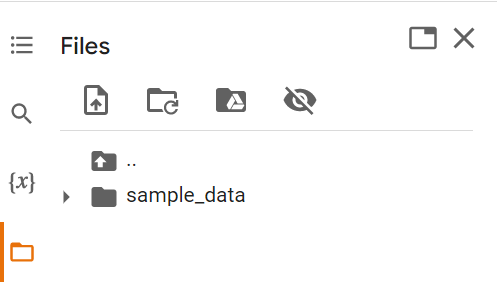

Drag and drop an image sample below the sample data and give it any name, can be "7.jpg". Once you're done it will look like this.

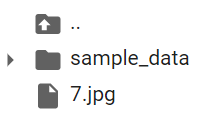

In [ ]:
# Read image data
img = cv2.imread("7.jpg")

# Convert image to grayscale image
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Rescale the resolution to 28x28
rescaled_image = cv2.resize(gray_image, (28,28))

# Show current image
plt.imshow(rescaled_image, cmap = 'gray')
plt.show()

# Reshape image
rescaled_image.shape

dum = rescaled_image.reshape(1, -1)/255
dum.shape

# Run prediction process with the created model
with tf.Session() as sess:
  saver.restore(sess, "./model/my_model.ckpt")
  z = output_layer.eval(feed_dict = {X:dum, keep_prob:1.0})
  y_pred = np.argmax(z, axis = 1)
  print("Prediction for test image is {0}".format(y_pred))

The prediction is not always accurate, but at least we understand the concept of how the image prediction works.

We just finished creating our first neural network model for image prediction.

# Week 6 (Session 2)

Now we are going learn about image denoising using neural network

In real life cases, it's hard to get clean and such good dataset like digit MNIST. So for the next section we will create a sample noisy images and convert it into a much cleaner image

The dataset that we are going to use is called Fashion MNIST. there are a lot of different dataset we can download from kaggle. After you have download your image dataset from Kaggle, upload it to your files directory

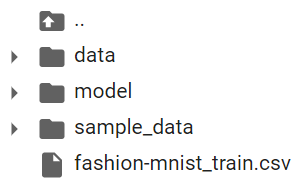

Install tensorflow 1.15.5

In [ ]:
!pip install tensorflow==1.15.5

Let's prepare all the libraries we will need including our Fashion MNIST dataset.

In [ ]:
# Import libraries
import os
import numpy as np

import zipfile
from urllib import request

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
import cv2

In [ ]:
# Read csv file with np.loadtxt function
img_database = np.loadtxt('fashion-mnist_train.csv', delimiter=',', skiprows=1)[:,1:]

# Show the total picture in the file
print(img_database.shape)

total_num_images = (img_database.shape[0])

Next, let's define the hyperparameter we're going to use.

In [ ]:
# Input Layer
n_input = 784 # Input image size is 28 x 28

# Hidden Layer
hidden_layer_1 = 256
hidden_layer_2 = 32
hidden_layer_3 = 32
hidden_layer_4 = 256

# Output layer
output_layer = 784

# Define the hyperparameters
learning_rate = 0.1
epochs = 100
batch_size = 100

# Define the placeholders
X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, output_layer])

In this neural network model, the output_layer is 784 because we want to produce a 28x28 image (the same size of input image but it's denoised). Meanwhile, the number of hidden layer doesn't matter.

We can set the weight and bias for the neural networks

In [ ]:
# Variables for each weights which will be updated on training process
Weight_NN = {"W1": tf.Variable(tf.random_normal([n_input, hidden_layer_1])),
             "W2": tf.Variable(tf.random_normal([hidden_layer_1, hidden_layer_2])),
             "W3": tf.Variable(tf.random_normal([hidden_layer_2, hidden_layer_3])),
             "W4": tf.Variable(tf.random_normal([hidden_layer_3, hidden_layer_4])),
             "W5": tf.Variable(tf.random_normal([hidden_layer_4, output_layer])),
             }

# Variables for each bias which will be updated on training process
Bias_NN = {"B1": tf.Variable(tf.random_normal([hidden_layer_1])),
           "B2": tf.Variable(tf.random_normal([hidden_layer_2])),
           "B3": tf.Variable(tf.random_normal([hidden_layer_3])),
           "B4": tf.Variable(tf.random_normal([hidden_layer_4])),
           "B5": tf.Variable(tf.random_normal([output_layer])),
           }

Next, we have to create the computational graph for the neural network

In [ ]:
# Neural Network
Z1 = tf.add(tf.matmul(X, Weight_NN["W1"]), Bias_NN["B1"])
Z1_out = tf.nn.sigmoid(Z1)

Z2 = tf.add(tf.matmul(Z1_out, Weight_NN["W2"]), Bias_NN["B2"])
Z2_out = tf.nn.sigmoid(Z2)

Z3 = tf.add(tf.matmul(Z2_out, Weight_NN["W3"]), Bias_NN["B3"])
Z3_out = tf.nn.sigmoid(Z3)

Z4 = tf.add(tf.matmul(Z3_out, Weight_NN["W4"]), Bias_NN["B4"])
Z4_out = tf.nn.sigmoid(Z4)

Z5 = tf.add(tf.matmul(Z4_out, Weight_NN["W5"]), Bias_NN["B5"])
Z5_out = tf.nn.sigmoid(Z5)

We can also use TensorFlow API to create the neural network model.

In [ ]:
Z1 = tf.layers.dense(X, hidden_layer_1, activation = tf.nn.sigmoid)
Z2 = tf.layers.dense(Z1, hidden_layer_2, activation = tf.nn.sigmoid)
Z3 = tf.layers.dense(Z1, hidden_layer_3, activation = tf.nn.sigmoid)
Z4 = tf.layers.dense(Z1, hidden_layer_4, activation = tf.nn.sigmoid)
NN_output = tf.layers.dense(Z4, output_layer)

To avoid bias, we can shuffle the database. Then, we can add the noise by 10 to finally get the noisy pictures that we want.

In [ ]:
# Shuffle the dataset
np.random.shuffle(img_database)

X_train = img_database

# Normalize the dataset
X_train = X_train

# Create a noisy dataset
X_train_noisy = X_train + 10 * np.random.normal(0, 1, size = X_train.shape)

# Original image
plt.imshow(X_train[0].reshape(28, 28), cmap = 'gray')
plt.show()

# Noisy image
plt.imshow(X_train_noisy[0].reshape(28,28), cmap = 'gray')
plt.show()

For the next step, we can define the loss, optimizer, and then we can initialize all variables.

In [ ]:
# The loss function
computed_loss = tf.reduce_mean(tf.square(NN_output-Y))

# Define the optimizer
optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(computed_loss)

# Initialize the variables
init = tf.global_variables_initializer()

When everything is finished, we can run the session to train the model.

In [ ]:
sess = tf.Session()
sess.run(init)

for epoch in range(epochs):

  for i in range(int(total_num_images/batch_size)):
    X_epoch = X_train[i * batch_size : (i+1) * batch_size]
    X_noise_epoch = X_train_noisy[i * batch_size : (i+1) * batch_size]
    _, loss = sess.run([optimizer, computed_loss], feed_dict = {X: X_noise_epoch, Y: X_epoch})
  
  print('Epoch', epoch, '/', epochs, 'loss', loss)

# Pick any image
X_actual = X_train[:10]
noisy_image = X_train_noisy[:10]

# Run it through the autoencoder
denoised_image = sess.run(NN_output, feed_dict={X:noisy_image})

From the result, you can see the the value of the loss is decreasing on every epoch. This is a good thing to produce a more accurate prediction.

There is also another way to run the session.

In [ ]:
# Another way of running session
X_actual = X_train[:10]
noisy_image = X_train_noisy[:10]
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    for i in range(int(total_num_images/batch_size)):
      X_epoch = X_train[i * batch_size : (i*1) * batch_size]
      X_noise_epoch = X_train_noisy[i * batch_size : (i*1)*batch_size]
      _, loss = sess.run([optimizer, computed_loss], feed_dict = {X: X_noise_epoch, Y: X_epoch})
    print('Epoch', epoch, '/', epochs, 'loss:', loss)
  denoised_image = sess.run(NN_output, feed_dict = {X: noisy_image})

# Print the original, denoised, and the noise image
fig, axes = plt.subplots(nrows=3, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_actual, noisy_image, denoised_image], axes):
  for img, ax in zip(images, row):
    ax.imshow(img.reshape((28,28)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

# Week 7

Previously we have learned about how to make a Linear Regression model and Neural Network model using tensorFlow API.
In this section we are going to make a neural network model out of torch and torchvision API. And with the help of Convolutional Neural Network we can make a new accurate model that later be used for prediction.

> What is Convolutional Neural Network (CNN)?
<br>
CNN is pretty similar to Neural Network, they consist of neurons that have weight and biases and is used to make preduction. The difference is that CNN is used for image prediction by looking at the pixel and modify the value to finally make the prediction.



> There are some popular popular terms in CNN, which are :

*   **Convolution Layer**<br>
The first layer in CNN that transforms the input image to extract features/part of the image that is considered important. Convolutional Layer works with the help of kernel, stride, padding, etc.
*   **Kernel** <br>
Kernel is a small matrix (smaller than the input image) that will move accross the image to extract the features from the input image.
*   **Stride**<br>
Stride takes control of how far the kernel will move accross the image, it uses pixel as the unit. If the stride is very large, the result picture would not be accurate.
*   **Padding**<br>
Padding adds extra pixel across the border of the image to help maintain the size/resolution of the image after the convolution process.
*   **Pooling Layer** <br>
The layer that downsamples the images in terms of height and width but keeps the same depth. Used to reduce overfitting and extract representative feature, on some cases can also increase computing efficiency. There are two types of pooling. Max Pooling takes the max value between the pixels inside a kernel, and Average Pooling which takes the mean value of all pixels inside a kernel.
*   **Flatten Layer**<br>
Flatten layer converts the pixel inside the images from 3d matrix into 1 matrix/vector to allow the fully connected layer process it.
*   **Fully Connected Layer**<br>
Layer where the weight and bias multiplication happens. In this layer, all the neurons are connected to each other. This layer is needed and important to make a classification type of prediction.





We can start making the CNN model by installing all the needed library and dataset.

In [ ]:
# Import libraries
import torchvision
import torchvision.transforms as transforms

from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt

Let's download the CIFAR10 dataset consist of different object images. This dataset have 10 different classes with 6000 images per class with the size of 32x32 pixels.

In [ ]:
# Load training dataset into a single batch
transform = transforms.Compose([transforms.ToTensor()])
trainset = CIFAR10(root='./pt_data', train = True, download = True, transform = transform)
trainloader = DataLoader(trainset, batch_size=len(trainset), shuffle=False)
data = next(iter(trainloader))

The next step is to convert the numpy arrays to the correct shape so we can plot the image.

In [ ]:
# Convert to numpy arrays of correct shape for plotting
train_images = data[0].numpy()
train_images = np.moveaxis(train_images, 1, 3)
train_labels = data[1].numpy()

In [ ]:
# Show one of the images in the CIFAR-10 dataset
print('Category: ', train_labels[100])
plt.figure(figsize = (1, 1))
plt.imshow(train_images[100])
plt.show()

Now, we need to install 'requests' which is a libraries from GitHub. Requests allows us to import any API from any users on GitHub.

In [ ]:
# Install requests library
!pip install requests

In [ ]:
# Import requests library
import requests

# Save datagenerators as file to colab working directory
# If you are using GitHub, make sure you get the "Raw" version of the code
url = 'https://raw.githubusercontent.com/NVDLI/LDL/main/pt_framework/utilities.py'
r = requests.get(url)

# make sure your filename is the same as how you want to import
with open('utilities.py', 'w') as f:
  f.write(r.text)

Once we're done, we can import torch and some other libraries to help us create the neural network model for the next step.

In [ ]:
# Import libraries
import torch
import torch.nn as nn

import torchvision
import torchvision.transforms as transforms

from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

import numpy as np

from utilities import train_model

Don't forget to define the hyperparameter and count the mean and the standard deviation so we can normalize the dataset on the next step.

In [ ]:
# Define the hyperparameter
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
EPOCHS = 128
BATCH_SIZE = 32

In [ ]:
# Load training dataset into a single batch to compute mean and stddev.
# transform = transforms.Compose([transforms.ToTensor()])
# trainset = CIFAR10(root='./pt_data', train = True, download = True, transform = transform)
# trainloader = DataLoader(trainset, batch_size=len(trainset), shuffle=False)
# data = next(iter(trainloader))

# Count the mean value and the standard deviation of the dataset
mean = data[0].mean()
stddev = data[0].std()

Now we are going to create a new set data which had been split from the previous data. This is where the mean and standard deviation value takes place in order to normalize the data.

In [ ]:
# Load and standardize training and test dataset.
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize(mean, stddev)
                                ])

trainset = CIFAR10(root='./pt_data', train = True, download = True, transform = transform)
testset = CIFAR10(root='./pt_data', train = True, download = True, transform = transform)

We can now create the neural network model using torch API. The neural network model consist of 2 Convolution 2d layers and ReLU activations. 1 flatten layer and 1 fully connected layer

In [ ]:
# CNN Model Architecture
model = nn.Sequential(
    
    # Convolution Layer 1
    nn.Conv2d(3, 64, 5, stride = 2, padding = 2), # Output is 64x16x16
    nn.ReLU(),

    # Convolution Layer 2
    nn.Conv2d(64, 64, 3, stride = 2, padding = 1), # Output is 64x8x8
    nn.ReLU(),

    # Flatten Layer
    nn.Flatten(),

    # Fully Connected Layer
    nn.Linear(64 * 8 * 8, 10)
)

Our CNN Model is finally done, continue by initializing tehe moedl and then train the model.

In [ ]:
# Retrieve layers for custom weight initialization.
layers = next(model.modules())
conv_layer0 = layers[0]
conv_layer1 = layers[2]
output_layer = layers[5]

# Kaiming (He) initialization.
nn.init.kaiming_normal_(conv_layer0.weight)
nn.init.constant_(conv_layer0.bias, 0.0)
nn.init.kaiming_normal_(conv_layer1.weight)
nn.init.constant_(conv_layer1.bias, 0.0)

# Xavier (Glorot) initialization.
nn.init.xavier_uniform_(output_layer.weight)
nn.init.constant_(output_layer.bias, 0.0)

# Loss function and optimizer
optimizer = torch.optim.Adam(model.parameters())
loss_function = nn.CrossEntropyLoss()

# Train the model
train_model(model, device, EPOCHS, BATCH_SIZE, trainset, testset, optimizer, loss_function, 'acc')

The CNN Model training process is completed and done. We can see the final result of the training accuracy and validation accuracy. If we want to take further step, we can make a prediction the images and decide which class does it looks most alike to.